In [1]:
# <<<<<<<< DATA UPLOADING AND MAPPING >>>>>>>>>>>>>>>>>>
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

names = ["Check_account", "Duration", "Credit_history", "Purpose", "Amount", "Saving_account", "Present_emp", 
                "Installement_rate" , "Sex", "Other_debtor", "Present_Residence", "Property", "Age", "Other-install",
                "Housing", "N_credit", "Job", "N_people", "Telephone", "Foreign_work", "Cost_matrix"]
#f= open("german.data", "r")

revdata =pd.read_csv("german data.csv", names= names)
data = pd.DataFrame(revdata)
#print(contents)
#data.info()
#data.describe()
#print(revdata.shape)
#print (revdata.columns)
#print(data.head(5))

# <<<<<<<<<<< Check null values >>>>>>>>>>
data.isnull().sum().sort_values()

#<<<<<<<<<<<< Mapping Data >>>>>>>>>>>


data["Check_account"] = data["Check_account"].map({'A14':"0",'A11':"<0 DM", 'A12': "0 <= <200 DM",
                                                   'A13':">= 200 DM "})

data["Credit_history"] = data["Credit_history"].map({"A34":"critical account","A33":"delay in paying off",
                                                     "A32":"existing credits paid",
                                                     "A31":"all credits at this bank paid back duly",
                                                     "A30":"no credits taken"})

data["Purpose"] = data["Purpose"].map({ "A40": "car-new", "A41": "car-used", "A42": "furniture", "A43": "television",
                                       "A44": "domestic appliances", "A45": "repairs", "A46": "education", "A47": "vacation",
                                      "A48": "retraining", "A49": "business", "A410": "others"})

data["Saving_account"] = data["Saving_account"].map({"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM",
                                                     "A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"})


data["Present_emp"] = data["Present_emp"].map({'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 
                                               'A72':"<1 years",'A71':"unemployed"})

data['Sex'] = data['Sex'].map({"A93": "male", "A92": "female", "A91": "male", "A94": "male", "A95": "female"})
data['Sex'] = data['Sex'].map({"male": "1" , "female": "0"})

data['Other_debtor'] = data['Other_debtor'].map({'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"})


data['Property'] = data['Property'].map({'A121':"real estate", 'A122':"savings agreement/life insurance", 
                                         'A123':"car or other", 'A124':"unknown / no property"})

data['Other-install'] = data['Other-install'].map({'A143':"none", 'A142':"store", 'A141':"bank"})


data["Housing"] = data["Housing"].map({"A151" : "rent", "A152" : "own", "A153" : "for free"})


data["Job"] = data["Job"].map({'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 
                               'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"})

data["Telephone"] = data["Telephone"].map({'A192':"yes", 'A191':"none"})



data["Foreign_work"] = data["Foreign_work"].map({'A201':"yes", 'A202':"no"})

data["Risk"] = data["Cost_matrix"].map({})
#print(data.head())

# <Make dummies variables of categorical data >>>>>>>>>


data.head()




,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Risk
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,NaN
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,22,none,own,1,skilled employee / official,1,none,yes,2,NaN
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,49,none,own,1,unskilled - resident,2,none,yes,1,NaN
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,1,NaN
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,53,none,for free,2,skilled employee / official,2,none,yes,2,NaN


In [2]:
data.shape

(1000, 22)

In [3]:
x= data[['Credit_history']]
x.head()

,Credit_history
0,critical account
1,existing credits paid
2,critical account
3,existing credits paid
4,delay in paying off


In [4]:
data.iloc[[0]]


,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Risk
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,NaN


In [5]:
data.iloc[:,0] # all rows of first column

0             <0 DM
1      0 <= <200 DM
2                 0
3             <0 DM
4             <0 DM
           ...     
995               0
996           <0 DM
997               0
998           <0 DM
999    0 <= <200 DM
Name: Check_account, Length: 1000, dtype: object

In [6]:
data.iloc[0:10, 0:2] 

,Check_account,Duration
0,<0 DM,6
1,0 <= <200 DM,48
2,0,12
3,<0 DM,42
4,<0 DM,24
5,0,36
6,0,24
7,0 <= <200 DM,36
8,0,12
9,0 <= <200 DM,30


In [7]:
data['Job_new' ] = data['Job']
data.head()

,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Risk,Job_new
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,none,own,2,skilled employee / official,1,yes,yes,1,NaN,skilled employee / official
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,none,own,1,skilled employee / official,1,none,yes,2,NaN,skilled employee / official
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,none,own,1,unskilled - resident,2,none,yes,1,NaN,unskilled - resident
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,none,for free,1,skilled employee / official,2,none,yes,1,NaN,skilled employee / official
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,none,for free,2,skilled employee / official,2,none,yes,2,NaN,skilled employee / official


In [8]:
data.drop(["Job_new"], axis=1, inplace=True)
data.head()
#as dimension column se start hoti ha islie axis 0 would be row and axis 1 would be column

,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Risk
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,NaN
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,22,none,own,1,skilled employee / official,1,none,yes,2,NaN
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,49,none,own,1,unskilled - resident,2,none,yes,1,NaN
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,1,NaN
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,53,none,for free,2,skilled employee / official,2,none,yes,2,NaN


In [9]:
data.isnull().sum()

Check_account           0
Duration                0
Credit_history          0
Purpose                 0
Amount                  0
Saving_account          0
Present_emp             0
Installement_rate       0
Sex                     0
Other_debtor            0
Present_Residence       0
Property                0
Age                     0
Other-install           0
Housing                 0
N_credit                0
Job                     0
N_people                0
Telephone               0
Foreign_work            0
Cost_matrix             0
Risk                 1000
dtype: int64

In [10]:
data.dtypes

Check_account         object
Duration               int64
Credit_history        object
Purpose               object
Amount                 int64
Saving_account        object
Present_emp           object
Installement_rate      int64
Sex                   object
Other_debtor          object
Present_Residence      int64
Property              object
Age                    int64
Other-install         object
Housing               object
N_credit               int64
Job                   object
N_people               int64
Telephone             object
Foreign_work          object
Cost_matrix            int64
Risk                 float64
dtype: object

In [11]:
data.head()

,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Risk
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,NaN
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,22,none,own,1,skilled employee / official,1,none,yes,2,NaN
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,49,none,own,1,unskilled - resident,2,none,yes,1,NaN
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,1,NaN
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,53,none,for free,2,skilled employee / official,2,none,yes,2,NaN


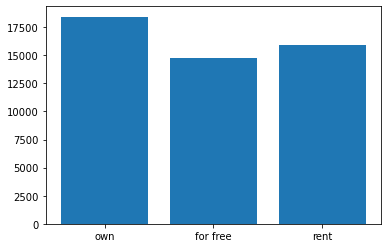

In [12]:
import matplotlib.pyplot as plt

plt.bar(data['Housing'], data['Amount'])

plt.show()

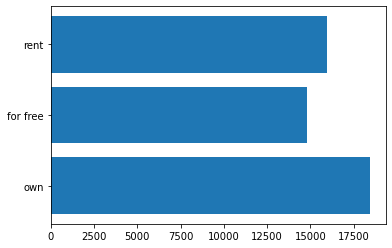

In [13]:
plt.barh(data['Housing'], data['Amount'] )

plt.show()

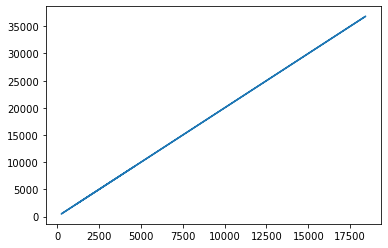

In [15]:
y = (2 *(data['Amount']))

plt.plot(data['Amount'], y)
plt.show()

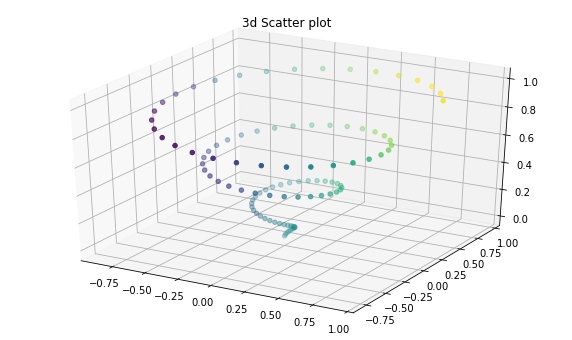

In [16]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)
c = x + y
ax.scatter(x, y, z, c=c)
ax.set_title('3d Scatter plot')
plt.show()

In [17]:
import seaborn as sns
male_credit = data["Amount"].loc[data["Sex"] == "1"].values
female_credit = data["Amount"].loc[data["Sex"] == "0"].values
total_credit = data["Amount"].values

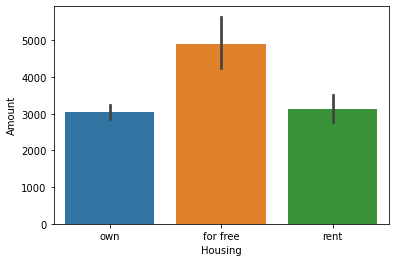

In [18]:
import seaborn as sns

sns.barplot(x = data['Housing'], y= data['Amount'] )
plt.show()


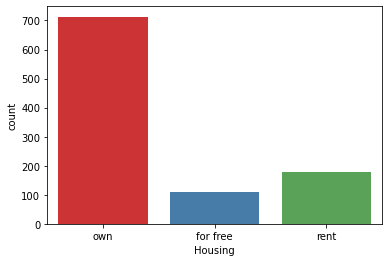

In [19]:
sns.countplot(x = data["Housing"], palette="Set1")

plt.show()

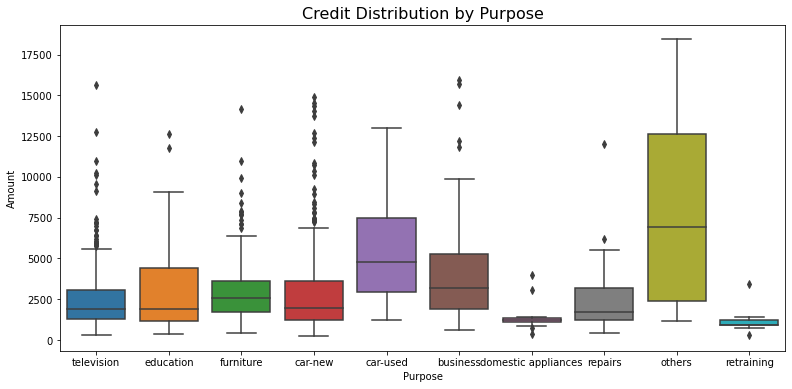

In [20]:
plt.figure(figsize=(13,6))
g = sns.boxplot(x='Purpose', y='Amount', data=data)

g.set_title("Credit Distribution by Purpose", fontsize=16)
plt.show()

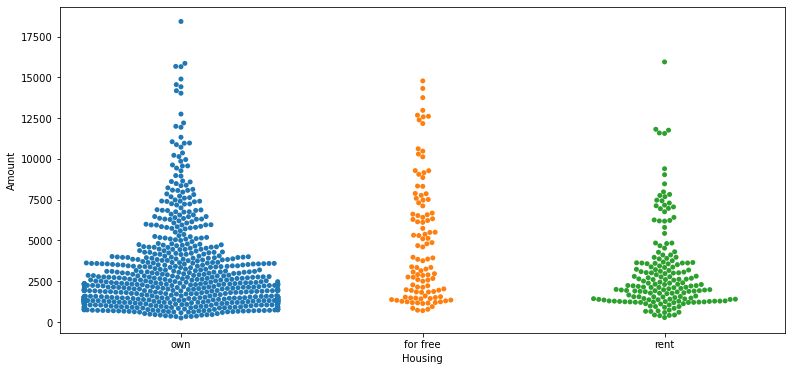

In [21]:
plt.figure(figsize=(13,6))
sns.swarmplot(x="Housing", y="Amount", data=data)

plt.show()

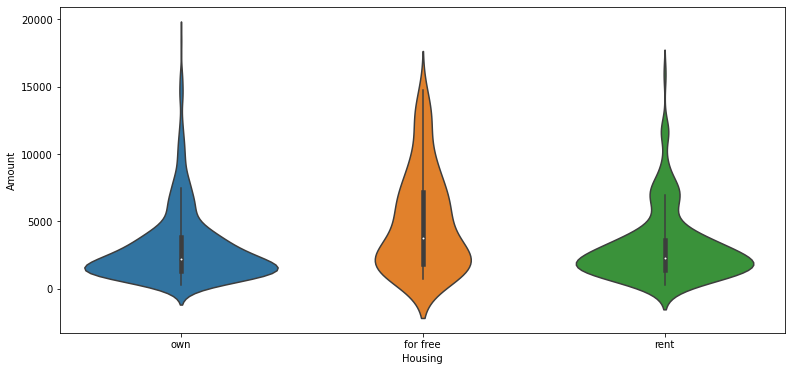

In [22]:
plt.figure(figsize=(13,6))
sns.violinplot(x="Housing", y="Amount", data=data)

plt.show()

In [23]:
lst = [data]
for col in lst:
    
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
data.head()

young = data["Amount"].loc[data["Age_Group"] == "Young"].values.tolist()
young_adults = data["Amount"].loc[data["Age_Group"] == "Young Adults"].values.tolist()
senior = data["Amount"].loc[data["Age_Group"] == "Senior"].values.tolist()
elder_credit = data["Amount"].loc[data["Age_Group"] == "Elder"].values.tolist()
#print(mylist)
mylist= [young, young_adults, senior, elder_credit]




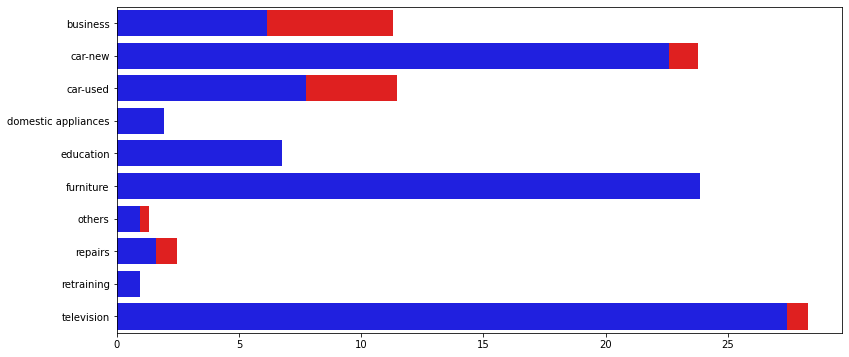

In [24]:
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum()*100 )


m_purpose = sex_purpose['1'].values
f_purpose = sex_purpose['0'].values
plt.figure(figsize=(13,6))

male = sns.barplot(x=m_purpose, y=['business','car-new', 'car-used', 'domestic appliances', 'education', 'furniture', 
                                    'others', 'repairs', 'retraining','television'], color="red")
female = sns.barplot(x=f_purpose, y=['business','car-new', 'car-used', 'domestic appliances', 'education', 'furniture', 
                                    'others', 'repairs', 'retraining','television'], color="blue")
#sns.set_color_codes("pastel")
plt.show()

In [25]:
data.drop(["Risk"], axis=1, inplace=True)
data.head()


,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Age_Group
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,Elder
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,22,none,own,1,skilled employee / official,1,none,yes,2,Young
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,49,none,own,1,unskilled - resident,2,none,yes,1,Senior
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,1,Senior
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,53,none,for free,2,skilled employee / official,2,none,yes,2,Senior


In [26]:
category = ["Purpose", "Age_Group"]
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(data[category[0]],data[category[1]]).style.background_gradient(cmap = cm)


Age_Group,Elder,Senior,Young,Young Adults
Purpose,,,,
business,9,13,36,39
car-new,19,54,71,90
car-used,9,25,31,38
domestic appliances,1,2,7,2
education,6,13,12,19
furniture,3,36,84,58
others,2,2,3,5
repairs,3,6,8,5
retraining,0,1,2,6


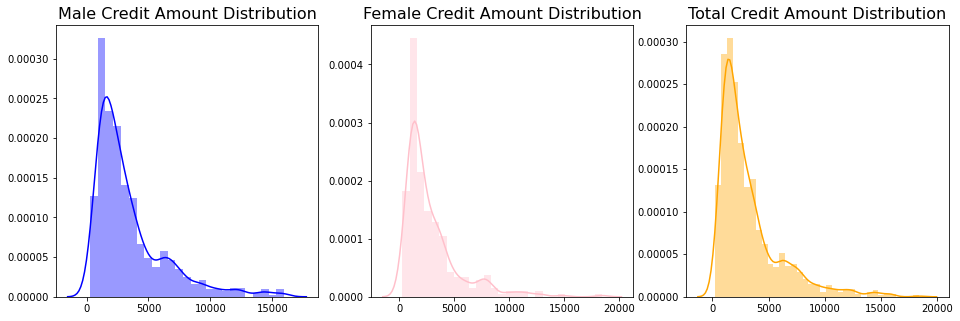

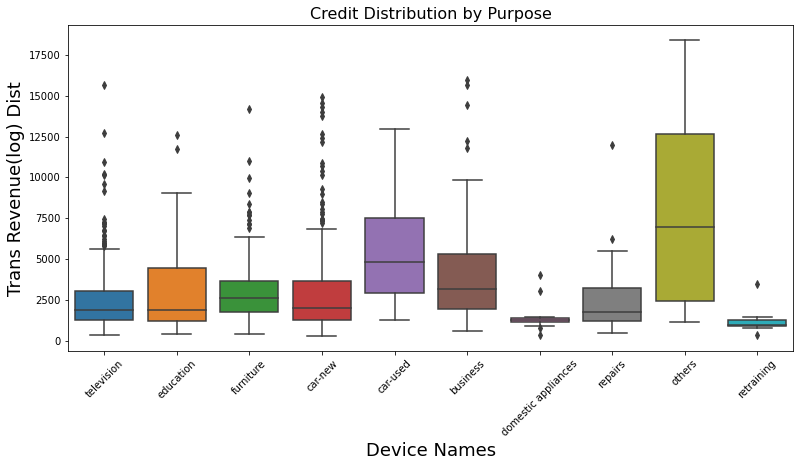

Sex                          0          1
Purpose                                  
business              6.129032  11.304348
car-new              22.580645  23.768116
car-used              7.741935  11.449275
domestic appliances   1.935484   0.869565
education             6.774194   4.202899
furniture            23.870968  15.507246
others                0.967742   1.304348
repairs               1.612903   2.463768
retraining            0.967742   0.869565
television           27.419355  28.260870


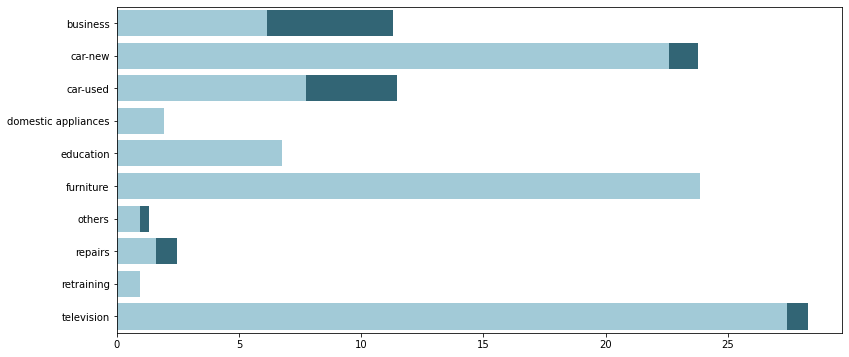

In [27]:
# <<<<<<<<<<<<< DATA EXPLORATION >>>>>>>>>>>>>>>

male_credit = data["Amount"].loc[data["Sex"] == "1"].values
female_credit = data["Amount"].loc[data["Sex"] == "0"].values
total_credit = data["Amount"].values


fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(male_credit, ax=ax[0], color="blue")
ax[0].set_title("Male Credit Amount Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="pink")
ax[1].set_title("Female Credit Amount Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="orange")
ax[2].set_title("Total Credit Amount Distribution", fontsize=16)
plt.show()


plt.figure(figsize=(13,6))
g = sns.boxplot(x='Purpose', y='Amount', 
                   data=data)


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

#<<<<< Gender vs Purpose Analysis >>>>>>>>>>>
data["Purpose"].unique()
sex_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum()*100 )
print(sex_purpose)

m_purpose = sex_purpose['1'].values
f_purpose = sex_purpose['0'].values
plt.figure(figsize=(13,6))

male = sns.barplot(x=m_purpose, y=['business','car-new', 'car-used', 'domestic appliances', 'education', 'furniture', 
                                    'others', 'repairs', 'retraining','television'], color="#276b80")
female = sns.barplot(x=f_purpose, y=['business','car-new', 'car-used', 'domestic appliances', 'education', 'furniture', 
                                    'others', 'repairs', 'retraining','television'], color="#99cfe0")
#sns.set_color_codes("pastel")
plt.show()

#data.head(10)
#fig = data.plot(kind = "hist", x = "Sex", y = "Age")
#histogram(data, x="Sex", y="Cost_matrix")
#plt.show()

,Check_account,Duration,Credit_history,Purpose,Amount,Saving_account,Present_emp,Installement_rate,Sex,Other_debtor,...,Age,Other-install,Housing,N_credit,Job,N_people,Telephone,Foreign_work,Cost_matrix,Age_Group
0,<0 DM,6,critical account,television,1169,no savings account,>=7 years,4,1,none,...,67,none,own,2,skilled employee / official,1,yes,yes,1,Elder
1,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,0,none,...,22,none,own,1,skilled employee / official,1,none,yes,2,Young
2,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,1,none,...,49,none,own,1,unskilled - resident,2,none,yes,1,Senior
3,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,1,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,1,Senior
4,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,1,none,...,53,none,for free,2,skilled employee / official,2,none,yes,2,Senior


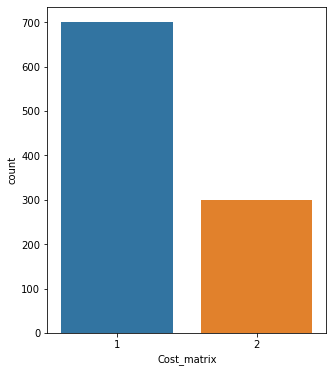

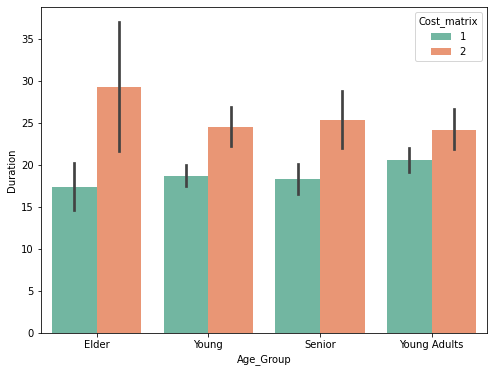

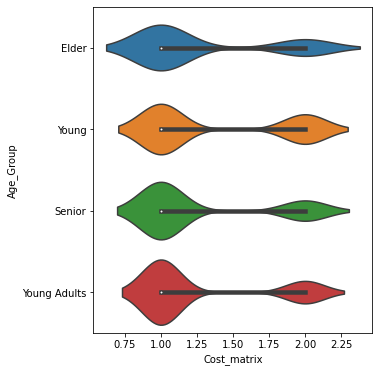

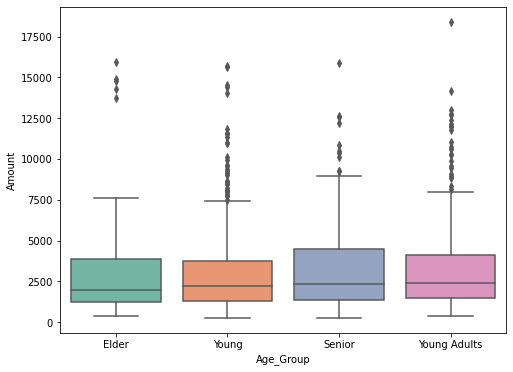

In [28]:
#<<<<<<<< segment the individuals a/c to their age group and 
#<<<<<<<< See the Credit amounts borrowed by clients belonging to each age group >>>>>>>>>>

lst = [data]
for col in lst:
    
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
#print(data.head())


young = data["Amount"].loc[data["Age_Group"] == "Young"].values.tolist()
young_adults = data["Amount"].loc[data["Age_Group"] == "Young Adults"].values.tolist()
senior = data["Amount"].loc[data["Age_Group"] == "Senior"].values.tolist()
elder_credit = data["Amount"].loc[data["Age_Group"] == "Elder"].values.tolist()
#print(mylist)
mylist= [young, young_adults, senior, elder_credit]

# <<<<< Identofying total number of good and bad values >>>>>>
plt.figure(figsize=(5,6))
#sns.barplot(x = data["Cost_matrix"], y = data["Age_Group"], hue=data["Cost_matrix"])
sns.countplot(x = data["Cost_matrix"])

# <<<<<< Identifying the good and bad variables wrt to duration and age group >>>>
plt.figure(figsize=(8,6))
sns.barplot(x = data["Age_Group"], y = data["Duration"], hue=data["Cost_matrix"], palette="Set2")
#sns.barplot(x = data["Cost_matrix"], y = data["Age_Group"], palette="Set2")

#<<<< Distribution of good and bad wrt to age groups >>>>> 
plt.figure(figsize=(5,6))
sns.violinplot (x= data["Cost_matrix"], y = data["Age_Group"], split=True)

# <<<< Identifying the amount of loan taken according to each age group >>>>>
plt.figure(figsize=(8,6))
sns.boxplot(x = data["Age_Group"], y = data["Amount"],palette="Set2")



data.head()

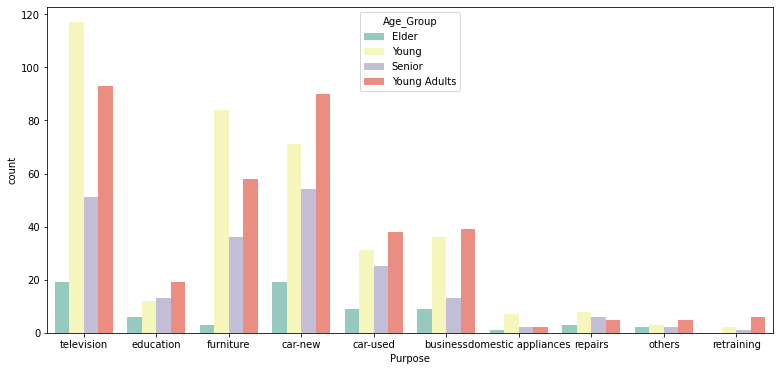

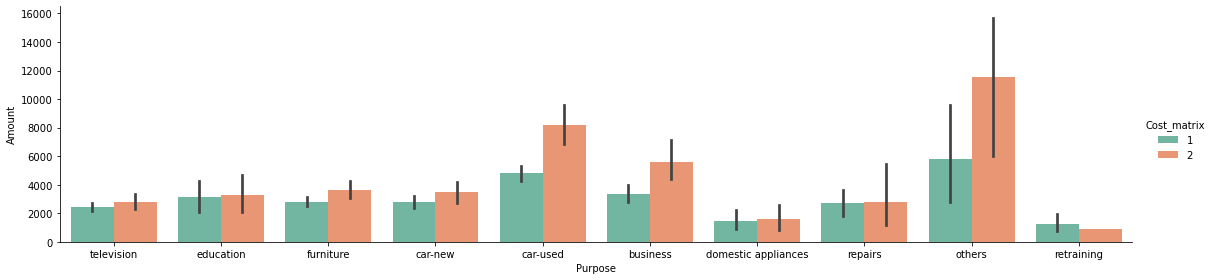

In [29]:
plt.figure(figsize=(13,6))
sns.countplot(data['Purpose'], hue = data['Age_Group'], palette='Set3')

#<<<<<<<<< Mean Credit Amount by purpose and Risk >>>> 
sns.catplot(x='Purpose', y='Amount', hue='Cost_matrix', kind='bar', palette='Set2', data=data, height=4, aspect=4)

plt.show()

In [30]:
category = ["Purpose", "Age_Group"]
cm = sns.light_palette("pink", as_cmap=True)
pd.crosstab(data[category[0]],data[category[1]]).style.background_gradient(cmap = cm)


Age_Group,Elder,Senior,Young,Young Adults
Purpose,,,,
business,9,13,36,39
car-new,19,54,71,90
car-used,9,25,31,38
domestic appliances,1,2,7,2
education,6,13,12,19
furniture,3,36,84,58
others,2,2,3,5
repairs,3,6,8,5
retraining,0,1,2,6


In [31]:
category = ["Cost_matrix", "Age_Group"]
cm = sns.light_palette("pink", as_cmap=True)
pd.crosstab(data[category[0]],data[category[1]]).style.background_gradient(cmap = cm)

Age_Group,Elder,Senior,Young,Young Adults
Cost_matrix,,,,
1,52,150,234,264
2,19,53,137,91


<ipython-input-40-34d69b22f539>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(X_train,y_train)


Training Accuracy:  0.70875
Testing Accuracy:  0.72


Text(33.0, 0.5, 'actual')

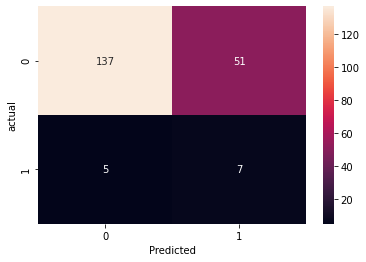

In [40]:
# <<<<<<<<< MODEL BUILDING >>>>>>>
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

SexinNumeric=LabelEncoder()
#HousinginNumeric=LabelEncoder()
SavingaccountinNumeric=LabelEncoder()
CheckingaccountinNumeric=LabelEncoder()
PurposeinNumeric=LabelEncoder()
AgeGroupinNumeric=LabelEncoder()
#PropertyinNumeric=LabelEncoder()
#data.info()

features = data.iloc[:,:10]
label = data.iloc[:,[-2]]
ag = data['Age_Group']
features = features.join(ag)

features['SexinNumeric']=SexinNumeric.fit_transform(features['Sex'])
#features['HousinginNumeric']=HousinginNumeric.fit_transform(features['Housing'])
features['SavingaccountinNumeric']=SavingaccountinNumeric.fit_transform(features['Saving_account'])
features['CheckingaccountinNumeric']=CheckingaccountinNumeric.fit_transform(features['Check_account'])
features['PurposeinNumeric']=PurposeinNumeric.fit_transform(features['Purpose'])
features['AgeGroupinNumeric']=AgeGroupinNumeric.fit_transform(features['Age_Group'])
#label['PropertyinNumeric']=PropertyinNumeric.fit_transform(label['Property'])
#features.tail()
#label.tail()
#ag = data['Age_Group']
#NewFeatures = NewFeatures.join(ag)

#NewFeatures

NewFeatures = features.drop(['Sex','Check_account','Installement_rate','Credit_history','Age_Group','Purpose','Saving_account', 'Present_emp', 'Other_debtor'], axis='columns')
#print(NewFeatures.head())


#NewLabel = label.drop(['Cost_matrix'], axis='columns')
#NewLabel.head()

X_train,X_test,y_train,y_test = train_test_split(NewFeatures,
                                                label,
                                                test_size=0.20,
                                                random_state=44)


#print(f'X_train dimension: {y_train.shape}')
#print(X_train)
model2 = KNeighborsClassifier(n_neighbors=25) #k = 5
model2.fit(X_train,y_train)
#model2.fit(X_train,y_train)
#print(X_train)
print("Training Accuracy: ",model2.score(X_train,y_train))
print("Testing Accuracy: ",model2.score(X_test,y_test))

CM2 = confusion_matrix(ypred2,y_test)
#print(classification_report(ypred2,y_test))
sns.heatmap(CM2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

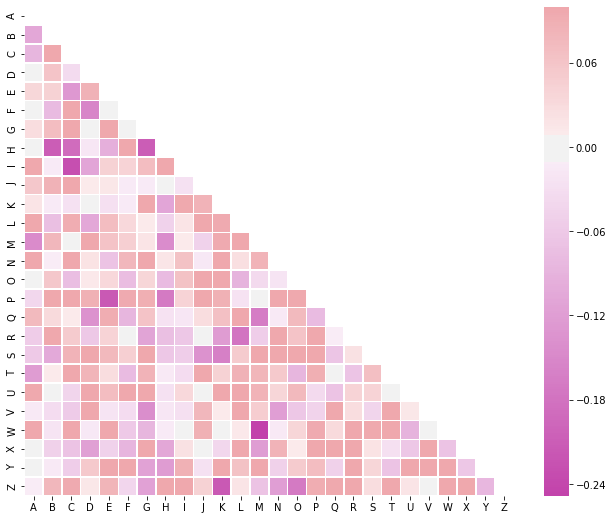

In [78]:
from string import ascii_letters

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
#print(mask)

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(320, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.10, center=0,
            square=True, linewidths=.5)

In [106]:
#f = plt.figure(figsize=(19, 15))
#plt.matshow(data.corr(), fignum=f.number)
#plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
#plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14, color = 'pink')
#plt.title('Correlation Matrix', fontsize=16);


#plt.matshow(NewFeatures.corr())
#plt.show()


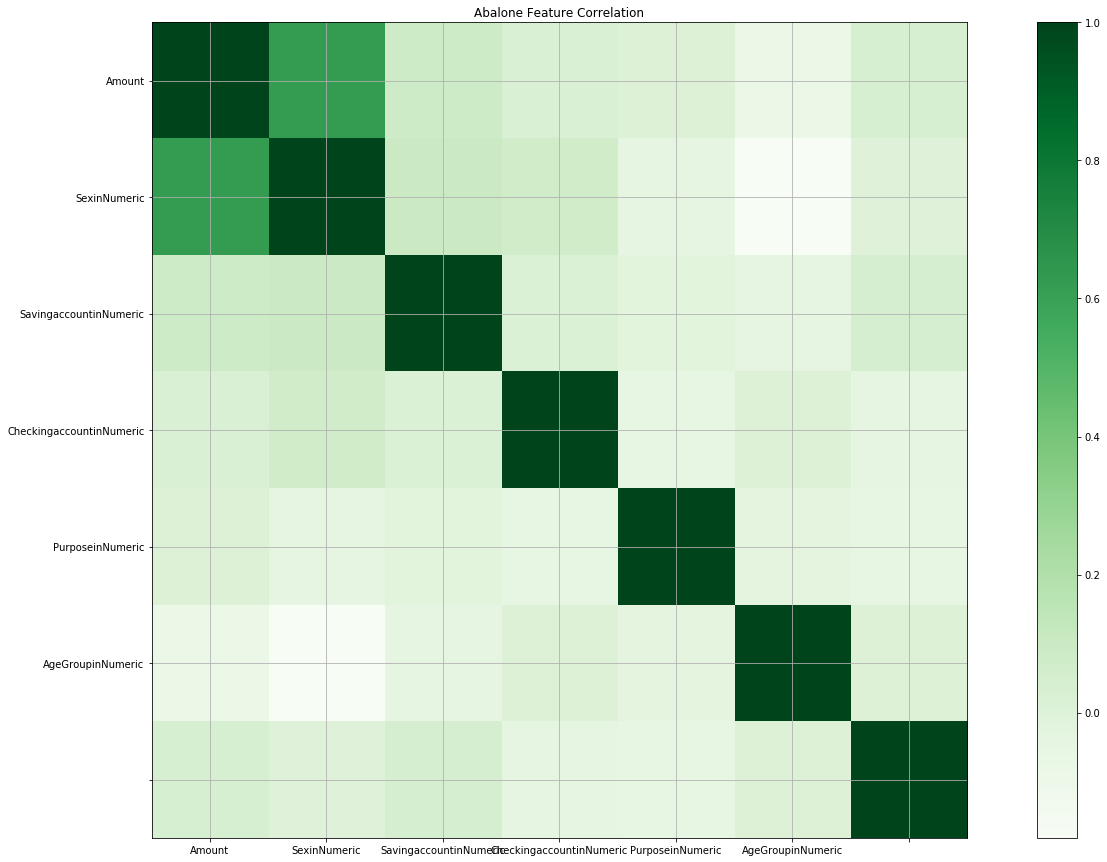

In [114]:
def correlation_matrix(NewFeatures):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    #fig.figure(figsize=(25,6))
    fig = plt.figure(figsize=(25,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cmap="Greens"
    cax = ax1.imshow(NewFeatures.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(NewFeatures,fontsize=10)
    ax1.set_yticklabels(NewFeatures,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

correlation_matrix(NewFeatures)#sns.heatmap(df, cmap="YlGnBu")
